In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
from io import StringIO

In [3]:
Refyear = 1992
Refyearind = Refyear-1900
Finyear = 2017
Finyearind = Finyear-1900
EnsembleNumber = 20000
YearNumber = 200

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074


3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731


5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372


6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013


8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711


10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
1037

11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
1175

12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
1313

14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
1459

16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
1618

17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
17494
17495
17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
1763

19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
1919

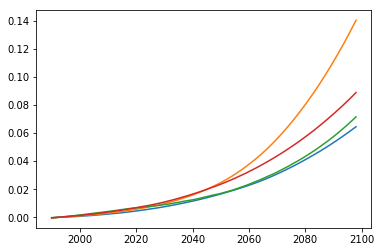

In [4]:
# Read data
# AISM_VUB

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_AISM_VUB_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_AISM_VUB_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_AISM_VUB_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_AISM_VUB_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_AISM_VUB_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_AISM_VUB_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_AISM_VUB_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_AISM_VUB_SU_RCP85 = SL_wTd_nos_base_AISM_VUB_R1_RCP85+SL_wTd_nos_base_AISM_VUB_R2_RCP85+SL_wTd_nos_base_AISM_VUB_R3_RCP85+SL_wTd_nos_base_AISM_VUB_R4_RCP85+SL_wTd_nos_base_AISM_VUB_R5_RCP85
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    #print(i)
    SL_wTd_nos_base_AISM_VUB_SU_RCP85_offset = SL_wTd_nos_base_AISM_VUB_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R0_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R1_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R2_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R3_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R4_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_AISM_VUB_R5_RCP85_offset = SL_wTd_nos_base_AISM_VUB_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_AISM_VUB_SU_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_SU_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_SU_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R0_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R0_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R0_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R1_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R1_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R1_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R2_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R2_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R2_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R3_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R3_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R3_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R4_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R4_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R4_RCP85_offset
        SL_wTd_nos_base_AISM_VUB_R5_RCP85[i,yr] = SL_wTd_nos_base_AISM_VUB_R5_RCP85[i,yr]-SL_wTd_nos_base_AISM_VUB_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_AISM_VUB_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_AISM_VUB_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_AISM_VUB_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_AISM_VUB_SU_RCP85[12530,90:199])



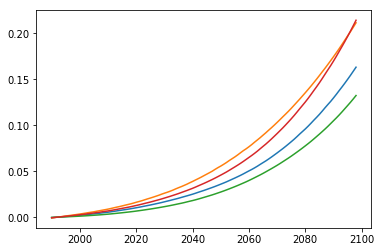

In [5]:
# Read data
# BISI_LBL

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_BISI_LBL_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_BISI_LBL_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_BISI_LBL_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_BISI_LBL_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_BISI_LBL_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_BISI_LBL_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_BISI_LBL_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_BISI_LBL_SU_RCP85 = SL_wTd_nos_base_BISI_LBL_R1_RCP85+SL_wTd_nos_base_BISI_LBL_R2_RCP85+SL_wTd_nos_base_BISI_LBL_R3_RCP85+SL_wTd_nos_base_BISI_LBL_R4_RCP85+SL_wTd_nos_base_BISI_LBL_R5_RCP85
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_BISI_LBL_SU_RCP85_offset = SL_wTd_nos_base_BISI_LBL_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R0_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R1_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R2_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R3_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R4_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_BISI_LBL_R5_RCP85_offset = SL_wTd_nos_base_BISI_LBL_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_BISI_LBL_SU_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_SU_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_SU_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R0_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R0_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R0_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R1_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R1_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R1_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R2_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R2_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R2_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R3_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R3_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R3_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R4_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R4_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R4_RCP85_offset
        SL_wTd_nos_base_BISI_LBL_R5_RCP85[i,yr] = SL_wTd_nos_base_BISI_LBL_R5_RCP85[i,yr]-SL_wTd_nos_base_BISI_LBL_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_BISI_LBL_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_BISI_LBL_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_BISI_LBL_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_BISI_LBL_SU_RCP85[12530,90:199])



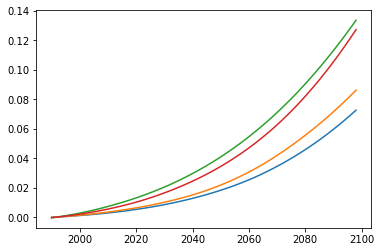

In [6]:
# Read data
# CISM_NCA

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_CISM_NCA_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_CISM_NCA_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_CISM_NCA_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_CISM_NCA_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_CISM_NCA_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_CISM_NCA_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_CISM_NCA_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_CISM_NCA_SU_RCP85 = SL_wTd_nos_base_CISM_NCA_R1_RCP85+SL_wTd_nos_base_CISM_NCA_R2_RCP85+SL_wTd_nos_base_CISM_NCA_R3_RCP85+SL_wTd_nos_base_CISM_NCA_R4_RCP85+SL_wTd_nos_base_CISM_NCA_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_CISM_NCA_SU_RCP85_offset = SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R0_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R1_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R2_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R3_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R4_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R5_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_SU_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R0_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R1_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R2_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R3_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R4_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[12530,90:199])



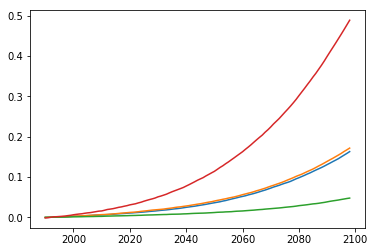

In [7]:
# Read data
# FETI_VUB

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_FETI_VUB_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_FETI_VUB_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_FETI_VUB_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_FETI_VUB_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_FETI_VUB_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_FETI_VUB_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_FETI_VUB_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_FETI_VUB_SU_RCP85 = SL_wTd_nos_base_FETI_VUB_R1_RCP85+SL_wTd_nos_base_FETI_VUB_R2_RCP85+SL_wTd_nos_base_FETI_VUB_R3_RCP85+SL_wTd_nos_base_FETI_VUB_R4_RCP85+SL_wTd_nos_base_FETI_VUB_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_FETI_VUB_SU_RCP85_offset = SL_wTd_nos_base_FETI_VUB_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R0_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R1_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R2_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R3_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R4_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_FETI_VUB_R5_RCP85_offset = SL_wTd_nos_base_FETI_VUB_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_FETI_VUB_SU_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_SU_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_SU_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R0_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R0_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R0_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R1_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R1_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R1_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R2_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R2_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R2_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R3_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R3_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R3_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R4_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R4_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R4_RCP85_offset
        SL_wTd_nos_base_FETI_VUB_R5_RCP85[i,yr] = SL_wTd_nos_base_FETI_VUB_R5_RCP85[i,yr]-SL_wTd_nos_base_FETI_VUB_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_FETI_VUB_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_FETI_VUB_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_FETI_VUB_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_FETI_VUB_SU_RCP85[12530,90:199])



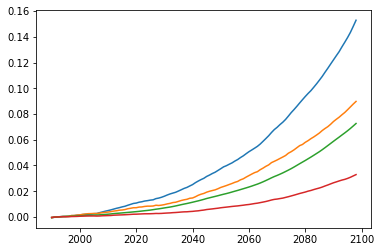

In [8]:
# Read data
# GRIS_LSC

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_GRIS_LSC_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_GRIS_LSC_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_GRIS_LSC_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_GRIS_LSC_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_GRIS_LSC_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_GRIS_LSC_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_GRIS_LSC_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_GRIS_LSC_SU_RCP85 = SL_wTd_nos_base_GRIS_LSC_R1_RCP85+SL_wTd_nos_base_GRIS_LSC_R2_RCP85+SL_wTd_nos_base_GRIS_LSC_R3_RCP85+SL_wTd_nos_base_GRIS_LSC_R4_RCP85+SL_wTd_nos_base_GRIS_LSC_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_GRIS_LSC_SU_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R0_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R1_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R2_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R3_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R4_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_GRIS_LSC_R5_RCP85_offset = SL_wTd_nos_base_GRIS_LSC_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_GRIS_LSC_SU_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_SU_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_SU_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R0_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R0_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R0_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R1_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R1_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R1_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R2_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R2_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R2_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R3_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R3_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R3_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R4_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R4_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R4_RCP85_offset
        SL_wTd_nos_base_GRIS_LSC_R5_RCP85[i,yr] = SL_wTd_nos_base_GRIS_LSC_R5_RCP85[i,yr]-SL_wTd_nos_base_GRIS_LSC_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_GRIS_LSC_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_GRIS_LSC_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_GRIS_LSC_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_GRIS_LSC_SU_RCP85[12530,90:199])



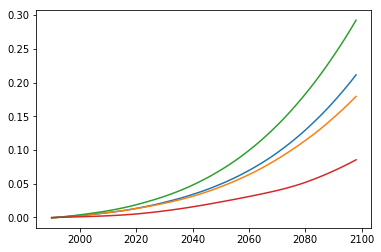

In [9]:
# Read data
# IMAU_VUB

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_IMAU_VUB_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_IMAU_VUB_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_IMAU_VUB_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_IMAU_VUB_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_IMAU_VUB_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_IMAU_VUB_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_IMAU_VUB_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_IMAU_VUB_SU_RCP85 = SL_wTd_nos_base_IMAU_VUB_R1_RCP85+SL_wTd_nos_base_IMAU_VUB_R2_RCP85+SL_wTd_nos_base_IMAU_VUB_R3_RCP85+SL_wTd_nos_base_IMAU_VUB_R4_RCP85+SL_wTd_nos_base_IMAU_VUB_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_IMAU_VUB_SU_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R0_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R1_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R2_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R3_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R4_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_IMAU_VUB_R5_RCP85_offset = SL_wTd_nos_base_IMAU_VUB_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_IMAU_VUB_SU_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_SU_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_SU_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R0_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R0_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R0_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R1_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R1_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R1_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R2_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R2_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R2_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R3_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R3_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R3_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R4_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R4_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R4_RCP85_offset
        SL_wTd_nos_base_IMAU_VUB_R5_RCP85[i,yr] = SL_wTd_nos_base_IMAU_VUB_R5_RCP85[i,yr]-SL_wTd_nos_base_IMAU_VUB_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_IMAU_VUB_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_IMAU_VUB_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_IMAU_VUB_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_IMAU_VUB_SU_RCP85[12530,90:199])



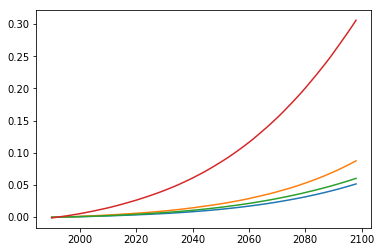

In [10]:
# Read data
# ISSM_JPL

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_ISSM_JPL_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_ISSM_JPL_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_ISSM_JPL_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_ISSM_JPL_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_ISSM_JPL_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_ISSM_JPL_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_ISSM_JPL_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_ISSM_JPL_SU_RCP85 = SL_wTd_nos_base_ISSM_JPL_R1_RCP85+SL_wTd_nos_base_ISSM_JPL_R2_RCP85+SL_wTd_nos_base_ISSM_JPL_R3_RCP85+SL_wTd_nos_base_ISSM_JPL_R4_RCP85+SL_wTd_nos_base_ISSM_JPL_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_ISSM_JPL_SU_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R0_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R1_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R2_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R3_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R4_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_JPL_R5_RCP85_offset = SL_wTd_nos_base_ISSM_JPL_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_ISSM_JPL_SU_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_SU_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_SU_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R0_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R0_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R0_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R1_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R1_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R1_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R2_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R2_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R2_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R3_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R3_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R3_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R4_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R4_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R4_RCP85_offset
        SL_wTd_nos_base_ISSM_JPL_R5_RCP85[i,yr] = SL_wTd_nos_base_ISSM_JPL_R5_RCP85[i,yr]-SL_wTd_nos_base_ISSM_JPL_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_JPL_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_JPL_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_JPL_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_JPL_SU_RCP85[12530,90:199])




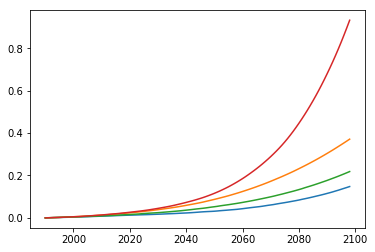

In [11]:
# Read data
# ISSM_UCI

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_ISSM_UCI_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_ISSM_UCI_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_ISSM_UCI_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_ISSM_UCI_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_ISSM_UCI_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_ISSM_UCI_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_ISSM_UCI_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_ISSM_UCI_SU_RCP85 = SL_wTd_nos_base_ISSM_UCI_R1_RCP85+SL_wTd_nos_base_ISSM_UCI_R2_RCP85+SL_wTd_nos_base_ISSM_UCI_R3_RCP85+SL_wTd_nos_base_ISSM_UCI_R4_RCP85+SL_wTd_nos_base_ISSM_UCI_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_ISSM_UCI_SU_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R0_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R1_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R2_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R3_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R4_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_ISSM_UCI_R5_RCP85_offset = SL_wTd_nos_base_ISSM_UCI_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_ISSM_UCI_SU_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_SU_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_SU_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R0_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R0_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R0_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R1_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R1_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R1_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R2_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R2_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R2_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R3_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R3_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R3_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R4_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R4_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R4_RCP85_offset
        SL_wTd_nos_base_ISSM_UCI_R5_RCP85[i,yr] = SL_wTd_nos_base_ISSM_UCI_R5_RCP85[i,yr]-SL_wTd_nos_base_ISSM_UCI_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_UCI_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_UCI_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_UCI_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_ISSM_UCI_SU_RCP85[12530,90:199])



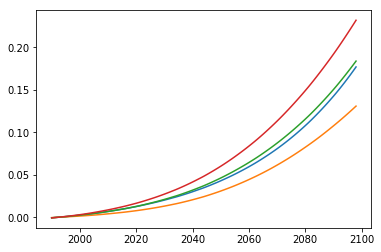

In [12]:
# Read data
# MALI_LAN

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_MALI_LAN_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_MALI_LAN_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_MALI_LAN_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_MALI_LAN_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_MALI_LAN_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_MALI_LAN_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_MALI_LAN_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_MALI_LAN_SU_RCP85 = SL_wTd_nos_base_MALI_LAN_R1_RCP85+SL_wTd_nos_base_MALI_LAN_R2_RCP85+SL_wTd_nos_base_MALI_LAN_R3_RCP85+SL_wTd_nos_base_MALI_LAN_R4_RCP85+SL_wTd_nos_base_MALI_LAN_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_MALI_LAN_SU_RCP85_offset = SL_wTd_nos_base_MALI_LAN_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R0_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R1_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R2_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R3_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R4_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_MALI_LAN_R5_RCP85_offset = SL_wTd_nos_base_MALI_LAN_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_MALI_LAN_SU_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_SU_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_SU_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R0_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R0_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R0_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R1_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R1_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R1_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R2_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R2_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R2_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R3_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R3_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R3_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R4_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R4_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R4_RCP85_offset
        SL_wTd_nos_base_MALI_LAN_R5_RCP85[i,yr] = SL_wTd_nos_base_MALI_LAN_R5_RCP85[i,yr]-SL_wTd_nos_base_MALI_LAN_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_MALI_LAN_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_MALI_LAN_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_MALI_LAN_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_MALI_LAN_SU_RCP85[12530,90:199])



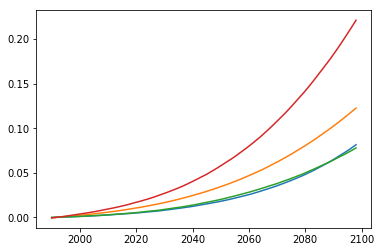

In [13]:
# Read data
# PISM_AWI

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_AWI_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_AWI_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_AWI_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_AWI_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_AWI_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_AWI_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_AWI_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_AWI_SU_RCP85 = SL_wTd_nos_base_PISM_AWI_R1_RCP85+SL_wTd_nos_base_PISM_AWI_R2_RCP85+SL_wTd_nos_base_PISM_AWI_R3_RCP85+SL_wTd_nos_base_PISM_AWI_R4_RCP85+SL_wTd_nos_base_PISM_AWI_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_AWI_SU_RCP85_offset = SL_wTd_nos_base_PISM_AWI_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R0_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R1_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R2_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R3_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R4_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_AWI_R5_RCP85_offset = SL_wTd_nos_base_PISM_AWI_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_AWI_SU_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_SU_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_SU_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R0_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R0_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R0_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R1_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R1_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R1_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R2_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R2_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R2_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R3_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R3_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R3_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R4_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R4_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R4_RCP85_offset
        SL_wTd_nos_base_PISM_AWI_R5_RCP85[i,yr] = SL_wTd_nos_base_PISM_AWI_R5_RCP85[i,yr]-SL_wTd_nos_base_PISM_AWI_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_AWI_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_AWI_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_AWI_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_AWI_SU_RCP85[12530,90:199])



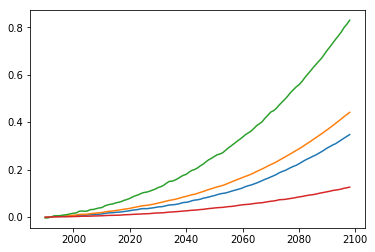

In [14]:
# Read data
# PISM_DMI

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_DMI_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_DMI_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_DMI_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_DMI_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_DMI_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_DMI_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_DMI_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_DMI_SU_RCP85 = SL_wTd_nos_base_PISM_DMI_R1_RCP85+SL_wTd_nos_base_PISM_DMI_R2_RCP85+SL_wTd_nos_base_PISM_DMI_R3_RCP85+SL_wTd_nos_base_PISM_DMI_R4_RCP85+SL_wTd_nos_base_PISM_DMI_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_DMI_SU_RCP85_offset = SL_wTd_nos_base_PISM_DMI_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R0_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R1_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R2_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R3_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R4_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_DMI_R5_RCP85_offset = SL_wTd_nos_base_PISM_DMI_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_DMI_SU_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_SU_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_SU_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R0_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R0_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R0_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R1_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R1_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R1_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R2_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R2_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R2_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R3_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R3_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R3_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R4_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R4_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R4_RCP85_offset
        SL_wTd_nos_base_PISM_DMI_R5_RCP85[i,yr] = SL_wTd_nos_base_PISM_DMI_R5_RCP85[i,yr]-SL_wTd_nos_base_PISM_DMI_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_DMI_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_DMI_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_DMI_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_DMI_SU_RCP85[12530,90:199])



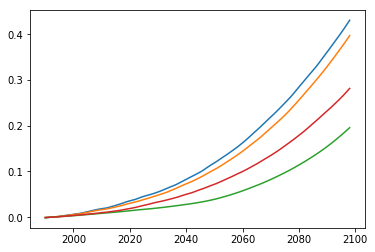

In [15]:
# Read data
# PISM_PIK

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_PIK_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_PIK_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_PIK_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_PIK_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_PIK_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_PIK_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_PIK_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_PIK_SU_RCP85 = SL_wTd_nos_base_PISM_PIK_R1_RCP85+SL_wTd_nos_base_PISM_PIK_R2_RCP85+SL_wTd_nos_base_PISM_PIK_R3_RCP85+SL_wTd_nos_base_PISM_PIK_R4_RCP85+SL_wTd_nos_base_PISM_PIK_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_PIK_SU_RCP85_offset = SL_wTd_nos_base_PISM_PIK_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R0_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R1_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R2_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R3_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R4_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_PIK_R5_RCP85_offset = SL_wTd_nos_base_PISM_PIK_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_PIK_SU_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_SU_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_SU_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R0_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R0_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R0_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R1_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R1_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R1_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R2_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R2_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R2_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R3_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R3_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R3_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R4_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R4_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R4_RCP85_offset
        SL_wTd_nos_base_PISM_PIK_R5_RCP85[i,yr] = SL_wTd_nos_base_PISM_PIK_R5_RCP85[i,yr]-SL_wTd_nos_base_PISM_PIK_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_PIK_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_PIK_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_PIK_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_PIK_SU_RCP85[12530,90:199])



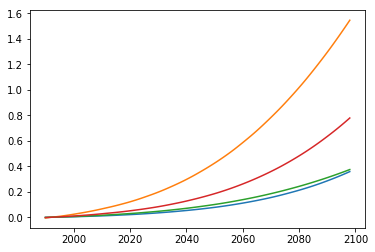

In [16]:
# Read data
# PISM_VUW

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PISM_VUW_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PISM_VUW_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PISM_VUW_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PISM_VUW_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PISM_VUW_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PISM_VUW_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PISM_VUW_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PISM_VUW_SU_RCP85 = SL_wTd_nos_base_PISM_VUW_R1_RCP85+SL_wTd_nos_base_PISM_VUW_R2_RCP85+SL_wTd_nos_base_PISM_VUW_R3_RCP85+SL_wTd_nos_base_PISM_VUW_R4_RCP85+SL_wTd_nos_base_PISM_VUW_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PISM_VUW_SU_RCP85_offset = SL_wTd_nos_base_PISM_VUW_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R0_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R1_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R2_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R3_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R4_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_PISM_VUW_R5_RCP85_offset = SL_wTd_nos_base_PISM_VUW_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PISM_VUW_SU_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_SU_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_SU_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R0_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R0_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R0_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R1_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R1_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R1_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R2_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R2_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R2_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R3_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R3_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R3_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R4_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R4_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R4_RCP85_offset
        SL_wTd_nos_base_PISM_VUW_R5_RCP85[i,yr] = SL_wTd_nos_base_PISM_VUW_R5_RCP85[i,yr]-SL_wTd_nos_base_PISM_VUW_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_VUW_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_VUW_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_VUW_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PISM_VUW_SU_RCP85[12530,90:199])



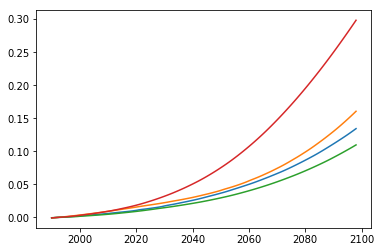

In [17]:
# Read data
# PS3D_PSU

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_PS3D_PSU_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_PS3D_PSU_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_PS3D_PSU_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_PS3D_PSU_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_PS3D_PSU_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_PS3D_PSU_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_PS3D_PSU_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_PS3D_PSU_SU_RCP85 = SL_wTd_nos_base_PS3D_PSU_R1_RCP85+SL_wTd_nos_base_PS3D_PSU_R2_RCP85+SL_wTd_nos_base_PS3D_PSU_R3_RCP85+SL_wTd_nos_base_PS3D_PSU_R4_RCP85+SL_wTd_nos_base_PS3D_PSU_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_PS3D_PSU_SU_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R0_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R1_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R2_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R3_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R4_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_PS3D_PSU_R5_RCP85_offset = SL_wTd_nos_base_PS3D_PSU_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_PS3D_PSU_SU_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_SU_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_SU_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R0_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R0_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R0_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R1_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R1_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R1_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R2_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R2_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R2_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R3_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R3_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R3_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R4_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R4_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R4_RCP85_offset
        SL_wTd_nos_base_PS3D_PSU_R5_RCP85[i,yr] = SL_wTd_nos_base_PS3D_PSU_R5_RCP85[i,yr]-SL_wTd_nos_base_PS3D_PSU_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_PS3D_PSU_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PS3D_PSU_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PS3D_PSU_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_PS3D_PSU_SU_RCP85[12530,90:199])



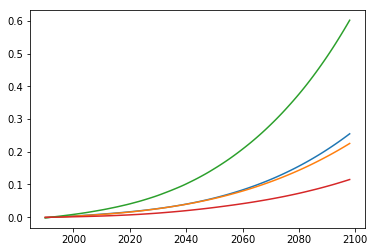

In [18]:
# Read data
# SICO_UHO

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_SICO_UHO_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_SICO_UHO_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_SICO_UHO_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_SICO_UHO_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_SICO_UHO_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_SICO_UHO_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_SICO_UHO_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_SICO_UHO_SU_RCP85 = SL_wTd_nos_base_SICO_UHO_R1_RCP85+SL_wTd_nos_base_SICO_UHO_R2_RCP85+SL_wTd_nos_base_SICO_UHO_R3_RCP85+SL_wTd_nos_base_SICO_UHO_R4_RCP85+SL_wTd_nos_base_SICO_UHO_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_SICO_UHO_SU_RCP85_offset = SL_wTd_nos_base_SICO_UHO_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R0_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R1_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R2_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R3_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R4_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_SICO_UHO_R5_RCP85_offset = SL_wTd_nos_base_SICO_UHO_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_SICO_UHO_SU_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_SU_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_SU_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R0_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R0_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R0_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R1_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R1_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R1_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R2_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R2_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R2_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R3_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R3_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R3_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R4_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R4_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R4_RCP85_offset
        SL_wTd_nos_base_SICO_UHO_R5_RCP85[i,yr] = SL_wTd_nos_base_SICO_UHO_R5_RCP85[i,yr]-SL_wTd_nos_base_SICO_UHO_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_SICO_UHO_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_SICO_UHO_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_SICO_UHO_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_SICO_UHO_SU_RCP85[12530,90:199])



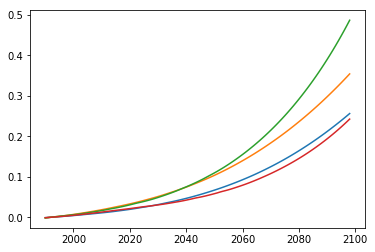

In [19]:
# Read data
# UA_UNN

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_UA_UNN_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_UA_UNN_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_UA_UNN_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_UA_UNN_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_UA_UNN_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_UA_UNN_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_UA_UNN_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_UA_UNN_SU_RCP85 = SL_wTd_nos_base_UA_UNN_R1_RCP85+SL_wTd_nos_base_UA_UNN_R2_RCP85+SL_wTd_nos_base_UA_UNN_R3_RCP85+SL_wTd_nos_base_UA_UNN_R4_RCP85+SL_wTd_nos_base_UA_UNN_R5_RCP85
ncf.close()


# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_UA_UNN_SU_RCP85_offset = SL_wTd_nos_base_UA_UNN_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R0_RCP85_offset = SL_wTd_nos_base_UA_UNN_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R1_RCP85_offset = SL_wTd_nos_base_UA_UNN_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R2_RCP85_offset = SL_wTd_nos_base_UA_UNN_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R3_RCP85_offset = SL_wTd_nos_base_UA_UNN_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R4_RCP85_offset = SL_wTd_nos_base_UA_UNN_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R5_RCP85_offset = SL_wTd_nos_base_UA_UNN_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_UA_UNN_SU_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_SU_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_SU_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R0_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R0_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R0_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R1_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R1_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R1_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R2_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R2_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R2_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R3_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R3_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R3_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R4_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R4_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R4_RCP85_offset
        SL_wTd_nos_base_UA_UNN_R5_RCP85[i,yr] = SL_wTd_nos_base_UA_UNN_R5_RCP85[i,yr]-SL_wTd_nos_base_UA_UNN_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_UA_UNN_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_UA_UNN_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_UA_UNN_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_UA_UNN_SU_RCP85[12530,90:199])



In [20]:
SL_wTd_nos_base_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_SU_RCP85,SL_wTd_nos_base_BISI_LBL_SU_RCP85,SL_wTd_nos_base_CISM_NCA_SU_RCP85,SL_wTd_nos_base_FETI_VUB_SU_RCP85,SL_wTd_nos_base_GRIS_LSC_SU_RCP85,SL_wTd_nos_base_IMAU_VUB_SU_RCP85,SL_wTd_nos_base_ISSM_JPL_SU_RCP85,SL_wTd_nos_base_ISSM_UCI_SU_RCP85,SL_wTd_nos_base_MALI_LAN_SU_RCP85,SL_wTd_nos_base_PISM_AWI_SU_RCP85,SL_wTd_nos_base_PISM_DMI_SU_RCP85,SL_wTd_nos_base_PISM_PIK_SU_RCP85,SL_wTd_nos_base_PISM_VUW_SU_RCP85,SL_wTd_nos_base_PS3D_PSU_SU_RCP85,SL_wTd_nos_base_SICO_UHO_SU_RCP85,SL_wTd_nos_base_UA_UNN_SU_RCP85])
#Weight_R0 = np.vstack([Weight_AISM_VUB_R0,Weight_BISI_LBL_R0,Weight_CISM_NCA_R0,Weight_FETI_VUB_R0,Weight_GRIS_LSC_R0,Weight_IMAU_VUB_R0,Weight_ISSM_JPL_R0,Weight_ISSM_UCI_R0,Weight_PISM_AWI_R0,Weight_PISM_DMI_R0,Weight_PISM_PIK_R0,Weight_PISM_VUW_R0,Weight_PS3D_PSU_R0,Weight_SICO_UHO_R0])
print(len(SL_wTd_nos_base_RCP85[0,:]))
print(len(SL_wTd_nos_base_RCP85[:,0]))

SL_wTd_nos_base_R1_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_R1_RCP85,SL_wTd_nos_base_BISI_LBL_R1_RCP85,SL_wTd_nos_base_CISM_NCA_R1_RCP85,SL_wTd_nos_base_FETI_VUB_R1_RCP85,SL_wTd_nos_base_GRIS_LSC_R1_RCP85,SL_wTd_nos_base_IMAU_VUB_R1_RCP85,SL_wTd_nos_base_ISSM_JPL_R1_RCP85,SL_wTd_nos_base_ISSM_UCI_R1_RCP85,SL_wTd_nos_base_MALI_LAN_R1_RCP85,SL_wTd_nos_base_PISM_AWI_R1_RCP85,SL_wTd_nos_base_PISM_DMI_R1_RCP85,SL_wTd_nos_base_PISM_PIK_R1_RCP85,SL_wTd_nos_base_PISM_VUW_R1_RCP85,SL_wTd_nos_base_PS3D_PSU_R1_RCP85,SL_wTd_nos_base_SICO_UHO_R1_RCP85,SL_wTd_nos_base_UA_UNN_R1_RCP85])
print(len(SL_wTd_nos_base_R1_RCP85[0,:]))
print(len(SL_wTd_nos_base_R1_RCP85[:,0]))

SL_wTd_nos_base_R2_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_R2_RCP85,SL_wTd_nos_base_BISI_LBL_R2_RCP85,SL_wTd_nos_base_CISM_NCA_R2_RCP85,SL_wTd_nos_base_FETI_VUB_R2_RCP85,SL_wTd_nos_base_GRIS_LSC_R2_RCP85,SL_wTd_nos_base_IMAU_VUB_R2_RCP85,SL_wTd_nos_base_ISSM_JPL_R2_RCP85,SL_wTd_nos_base_ISSM_UCI_R2_RCP85,SL_wTd_nos_base_MALI_LAN_R2_RCP85,SL_wTd_nos_base_PISM_AWI_R2_RCP85,SL_wTd_nos_base_PISM_DMI_R2_RCP85,SL_wTd_nos_base_PISM_PIK_R2_RCP85,SL_wTd_nos_base_PISM_VUW_R2_RCP85,SL_wTd_nos_base_PS3D_PSU_R2_RCP85,SL_wTd_nos_base_SICO_UHO_R2_RCP85,SL_wTd_nos_base_UA_UNN_R2_RCP85])
print(len(SL_wTd_nos_base_R2_RCP85[0,:]))
print(len(SL_wTd_nos_base_R2_RCP85[:,0]))

SL_wTd_nos_base_R3_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_R3_RCP85,SL_wTd_nos_base_BISI_LBL_R3_RCP85,SL_wTd_nos_base_CISM_NCA_R3_RCP85,SL_wTd_nos_base_FETI_VUB_R3_RCP85,SL_wTd_nos_base_GRIS_LSC_R3_RCP85,SL_wTd_nos_base_IMAU_VUB_R3_RCP85,SL_wTd_nos_base_ISSM_JPL_R3_RCP85,SL_wTd_nos_base_ISSM_UCI_R3_RCP85,SL_wTd_nos_base_MALI_LAN_R3_RCP85,SL_wTd_nos_base_PISM_AWI_R3_RCP85,SL_wTd_nos_base_PISM_DMI_R3_RCP85,SL_wTd_nos_base_PISM_PIK_R3_RCP85,SL_wTd_nos_base_PISM_VUW_R3_RCP85,SL_wTd_nos_base_PS3D_PSU_R3_RCP85,SL_wTd_nos_base_SICO_UHO_R3_RCP85,SL_wTd_nos_base_UA_UNN_R3_RCP85])
print(len(SL_wTd_nos_base_R3_RCP85[0,:]))
print(len(SL_wTd_nos_base_R3_RCP85[:,0]))

SL_wTd_nos_base_R4_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_R4_RCP85,SL_wTd_nos_base_BISI_LBL_R4_RCP85,SL_wTd_nos_base_CISM_NCA_R4_RCP85,SL_wTd_nos_base_FETI_VUB_R4_RCP85,SL_wTd_nos_base_GRIS_LSC_R4_RCP85,SL_wTd_nos_base_IMAU_VUB_R4_RCP85,SL_wTd_nos_base_ISSM_JPL_R4_RCP85,SL_wTd_nos_base_ISSM_UCI_R4_RCP85,SL_wTd_nos_base_MALI_LAN_R4_RCP85,SL_wTd_nos_base_PISM_AWI_R4_RCP85,SL_wTd_nos_base_PISM_DMI_R4_RCP85,SL_wTd_nos_base_PISM_PIK_R4_RCP85,SL_wTd_nos_base_PISM_VUW_R4_RCP85,SL_wTd_nos_base_PS3D_PSU_R4_RCP85,SL_wTd_nos_base_SICO_UHO_R4_RCP85,SL_wTd_nos_base_UA_UNN_R4_RCP85])
print(len(SL_wTd_nos_base_R4_RCP85[0,:]))
print(len(SL_wTd_nos_base_R4_RCP85[:,0]))

SL_wTd_nos_base_R5_RCP85 =np.vstack([SL_wTd_nos_base_AISM_VUB_R5_RCP85,SL_wTd_nos_base_BISI_LBL_R5_RCP85,SL_wTd_nos_base_CISM_NCA_R5_RCP85,SL_wTd_nos_base_FETI_VUB_R5_RCP85,SL_wTd_nos_base_GRIS_LSC_R5_RCP85,SL_wTd_nos_base_IMAU_VUB_R5_RCP85,SL_wTd_nos_base_ISSM_JPL_R5_RCP85,SL_wTd_nos_base_ISSM_UCI_R5_RCP85,SL_wTd_nos_base_MALI_LAN_R5_RCP85,SL_wTd_nos_base_PISM_AWI_R5_RCP85,SL_wTd_nos_base_PISM_DMI_R5_RCP85,SL_wTd_nos_base_PISM_PIK_R5_RCP85,SL_wTd_nos_base_PISM_VUW_R5_RCP85,SL_wTd_nos_base_PS3D_PSU_R5_RCP85,SL_wTd_nos_base_SICO_UHO_R5_RCP85,SL_wTd_nos_base_UA_UNN_R5_RCP85])
print(len(SL_wTd_nos_base_R5_RCP85[0,:]))
print(len(SL_wTd_nos_base_R5_RCP85[:,0]))


200
320016
200
320016
200
320016
200
320016
200
320016
200
320016


In [21]:
# compute cumulative probability distributions
cdfnum = 1000
cdfstep = int(len(SL_wTd_nos_base_RCP85[:,0])/cdfnum)
print(cdfstep)

SL_wTd_nos_base_R0_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_RCP85[1,:])):
    print("R0: ",t)
    sortind = np.argsort(SL_wTd_nos_base_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R0_RCP85_cdf=np.vstack([SL_wTd_nos_base_R0_RCP85_cdf, slcdf])


SL_wTd_nos_base_R1_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_R1_RCP85[1,:])):
    print("R1: ",t)
    sortind = np.argsort(SL_wTd_nos_base_R1_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_R1_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R1_RCP85_cdf=np.vstack([SL_wTd_nos_base_R1_RCP85_cdf, slcdf])

SL_wTd_nos_base_R2_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_R2_RCP85[1,:])):
    print("R2: ",t)
    sortind = np.argsort(SL_wTd_nos_base_R2_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_R2_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R2_RCP85_cdf=np.vstack([SL_wTd_nos_base_R2_RCP85_cdf, slcdf])

SL_wTd_nos_base_R3_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_R3_RCP85[1,:])):
    print("R3: ",t)
    sortind = np.argsort(SL_wTd_nos_base_R3_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_R3_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R3_RCP85_cdf=np.vstack([SL_wTd_nos_base_R3_RCP85_cdf, slcdf])

SL_wTd_nos_base_R4_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_R4_RCP85[1,:])):
    print("R4: ",t)
    sortind = np.argsort(SL_wTd_nos_base_R4_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_R4_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R4_RCP85_cdf=np.vstack([SL_wTd_nos_base_R4_RCP85_cdf, slcdf])

SL_wTd_nos_base_R5_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_R5_RCP85[1,:])):
    print("R5: ",t)
    sortind = np.argsort(SL_wTd_nos_base_R5_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_R5_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_R5_RCP85_cdf=np.vstack([SL_wTd_nos_base_R5_RCP85_cdf, slcdf])


Percentile = np.arange(0,float((cdfnum+1)/cdfnum),float(1/cdfnum))

# write cdfs
ncfile = nc.Dataset('Cdfs/SL_hindcast_wTd_nos_base_RCP85_cdf.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Percentile', None)

SL_wTd_weighted_base_R0 = ncfile.createVariable('Antarctica', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R1 = ncfile.createVariable('EAIS', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R2 = ncfile.createVariable('Ross', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R3 = ncfile.createVariable('Amundsen', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R4 = ncfile.createVariable('Weddell', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R5 = ncfile.createVariable('Peninsula', 'f4', ('Time','Percentile'))
p = ncfile.createVariable('Percentile', 'f4', 'Percentile')
t = ncfile.createVariable('Time', 'f4', 'Time')

t[:] = Time
t.units = 'years'
SL_wTd_weighted_base_R0[:,:] = SL_wTd_nos_base_R0_RCP85_cdf
SL_wTd_weighted_base_R1[:,:] = SL_wTd_nos_base_R1_RCP85_cdf
SL_wTd_weighted_base_R2[:,:] = SL_wTd_nos_base_R2_RCP85_cdf
SL_wTd_weighted_base_R3[:,:] = SL_wTd_nos_base_R3_RCP85_cdf
SL_wTd_weighted_base_R4[:,:] = SL_wTd_nos_base_R4_RCP85_cdf
SL_wTd_weighted_base_R5[:,:] = SL_wTd_nos_base_R5_RCP85_cdf
p[:] = Percentile

SL_wTd_weighted_base_R0.units = 'meter'
SL_wTd_weighted_base_R1.units = 'meter'
SL_wTd_weighted_base_R2.units = 'meter'
SL_wTd_weighted_base_R3.units = 'meter'
SL_wTd_weighted_base_R4.units = 'meter'
SL_wTd_weighted_base_R5.units = 'meter'

p.units = 'percent'

ncfile.close()

320
R0:  0
R0:  1
R0:  2
R0:  3
R0:  4
R0:  5
R0:  6
R0:  7
R0:  8
R0:  9
R0:  10
R0:  11
R0:  12
R0:  13
R0:  14
R0:  15
R0:  16
R0:  17
R0:  18
R0:  19
R0:  20
R0:  21
R0:  22
R0:  23
R0:  24
R0:  25
R0:  26
R0:  27
R0:  28
R0:  29
R0:  30
R0:  31
R0:  32
R0:  33
R0:  34
R0:  35
R0:  36
R0:  37
R0:  38
R0:  39
R0:  40
R0:  41
R0:  42
R0:  43
R0:  44
R0:  45
R0:  46
R0:  47
R0:  48
R0:  49
R0:  50
R0:  51
R0:  52
R0:  53
R0:  54
R0:  55
R0:  56
R0:  57
R0:  58
R0:  59
R0:  60
R0:  61
R0:  62
R0:  63
R0:  64
R0:  65
R0:  66
R0:  67
R0:  68
R0:  69
R0:  70
R0:  71
R0:  72
R0:  73
R0:  74
R0:  75
R0:  76
R0:  77
R0:  78
R0:  79
R0:  80
R0:  81
R0:  82
R0:  83
R0:  84
R0:  85
R0:  86
R0:  87
R0:  88
R0:  89
R0:  90
R0:  91
R0:  92
R0:  93
R0:  94
R0:  95
R0:  96
R0:  97
R0:  98
R0:  99
R0:  100
R0:  101
R0:  102
R0:  103
R0:  104
R0:  105
R0:  106
R0:  107
R0:  108
R0:  109
R0:  110
R0:  111
R0:  112
R0:  113
R0:  114
R0:  115
R0:  116
R0:  117
R0:  118
R0:  119
R0:  120
R0:  121
R0:  122

R4:  174
R4:  175
R4:  176
R4:  177
R4:  178
R4:  179
R4:  180
R4:  181
R4:  182
R4:  183
R4:  184
R4:  185
R4:  186
R4:  187
R4:  188
R4:  189
R4:  190
R4:  191
R4:  192
R4:  193
R4:  194
R4:  195
R4:  196
R4:  197
R4:  198
R4:  199
R5:  0
R5:  1
R5:  2
R5:  3
R5:  4
R5:  5
R5:  6
R5:  7
R5:  8
R5:  9
R5:  10
R5:  11
R5:  12
R5:  13
R5:  14
R5:  15
R5:  16
R5:  17
R5:  18
R5:  19
R5:  20
R5:  21
R5:  22
R5:  23
R5:  24
R5:  25
R5:  26
R5:  27
R5:  28
R5:  29
R5:  30
R5:  31
R5:  32
R5:  33
R5:  34
R5:  35
R5:  36
R5:  37
R5:  38
R5:  39
R5:  40
R5:  41
R5:  42
R5:  43
R5:  44
R5:  45
R5:  46
R5:  47
R5:  48
R5:  49
R5:  50
R5:  51
R5:  52
R5:  53
R5:  54
R5:  55
R5:  56
R5:  57
R5:  58
R5:  59
R5:  60
R5:  61
R5:  62
R5:  63
R5:  64
R5:  65
R5:  66
R5:  67
R5:  68
R5:  69
R5:  70
R5:  71
R5:  72
R5:  73
R5:  74
R5:  75
R5:  76
R5:  77
R5:  78
R5:  79
R5:  80
R5:  81
R5:  82
R5:  83
R5:  84
R5:  85
R5:  86
R5:  87
R5:  88
R5:  89
R5:  90
R5:  91
R5:  92
R5:  93
R5:  94
R5:  95
R5:  96


200
200


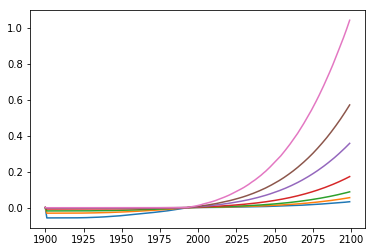

In [22]:

print(len(Time))
print(len(SL_wTd_nos_base_R0_RCP85_cdf[0:-1,500]))
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,10])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,50])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,166])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,500])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,833])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,950])
plt.plot(Time,SL_wTd_nos_base_R0_RCP85_cdf[0:-1,990])


In [23]:
print(SL_wTd_nos_base_R0_RCP85_cdf[-1,833])
print(SL_wTd_nos_base_R0_RCP85_cdf[-1,950])
print(SL_wTd_nos_base_R0_RCP85_cdf[-1,990])

0.36561012268066406
0.584205687046051
1.06571626663208
